In [1]:
using JLD, PyPlot

In [6]:
archivo="LFP_Promedio_est_con3.jld"

"LFP_Promedio_est_con3.jld"

In [48]:
palabrita="est3_con1"

"est3_con1"

In [24]:
LFP=load(archivo)["LFPSaturados"];
saturados=load(archivo)["CanalesSaturados"];
respuestas=load(archivo)["Canalesrespuesta"];
frecuencia=load(archivo)["freq"]
retrazo=load(archivo)["retrazo"]


90

In [25]:
limites=3000
tmax=size(LFP,3)

1163

In [10]:
tantossaturados=length(saturados)
tantosrespuesta=length(respuestas);


xxsresp=zeros(tantosrespuesta)
yysresp=zeros(tantosrespuesta)
j=1
for q in respuestas
    xxsresp[j]=q[2]
    yysresp[j]=q[1]
    j+=1
end
xxssatu=zeros(tantossaturados)
yyssatu=zeros(tantossaturados)
j=1
for q in saturados
    xxssatu[j]=q[2]
    yyssatu[j]=q[1]
    j+=1
end


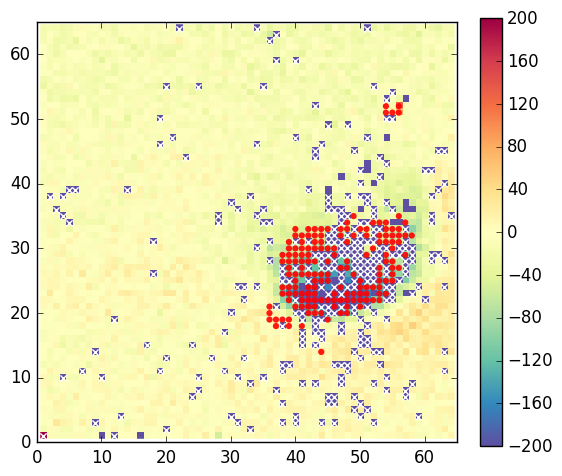

PyObject <matplotlib.collections.PathCollection object at 0x7fd015e34518>

In [47]:
t=150
ejemplo=LFP[:,:,t];
figure(figsize=(6,6))
limites=200
xlim(0,65)
ylim(0,65)

  #  tiempo=round((t-retrazo)/frecuencia,1)
 #   title("t= $tiempo")
imagen=imshow(ejemplo, origin="lower", interpolation="nearest", cmap="Spectral_r", 
vmin=-limites,vmax=limites, extent=[0.5,64.5,0.5,64.5])
    cb=colorbar(imagen, fraction=0.046)
    

        scatter(xxsresp,yysresp, alpha=0.9, c="red", edgecolor="none")
        scatter(xxssatu,yyssatu, alpha=1.0, c="white", edgecolor="white", marker="x", lw=1) 
    




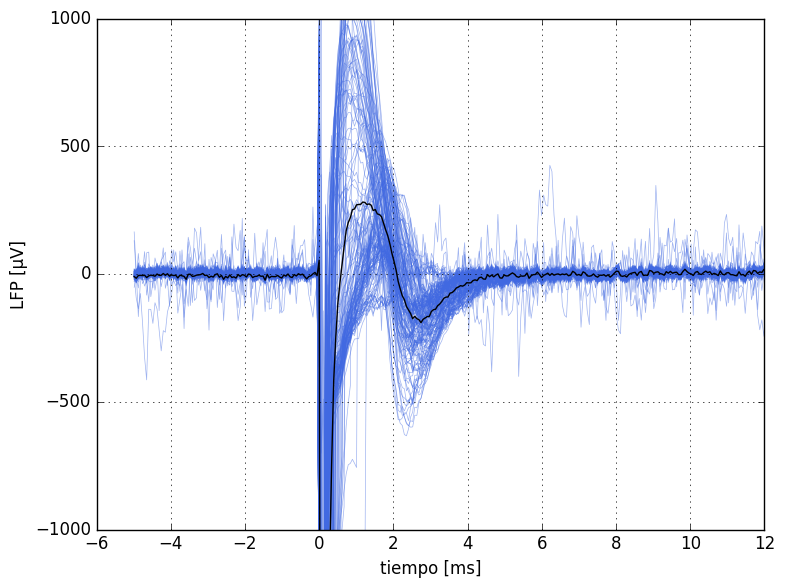

161


In [52]:
desde=round(Int, ceil(5*frecuencia))
tiemporeal=map(x->(x-desde)/frecuencia,1:tmax)
limites=1000


figure(figsize=(8,6))
grid()
xlim(-6,12)

ylim(-limites,limites)
thewholefockenevent=[]
promedio=zeros(tmax)
k=0

for q in respuestas
    x=q[2]
    y=q[1]
    if x != 1 && y != 1 
    k+=1
    datos=vec(LFP[y,x,1:tmax])
        thewholefockenevent=vcat(thewholefockenevent,datos)
    promedio+=datos
 
        plot(tiemporeal, datos, c="royalblue", alpha=0.5, lw=0.5)   
    end
end
promedio=promedio/k
plot(tiemporeal, promedio, c="black")
xlabel("tiempo [ms]")
ylabel("LFP [µV]")

tight_layout()
println(k)

outname=string(palabrita,"Trazos_respuesta-01.png")

savefig(outname, dpi=90)


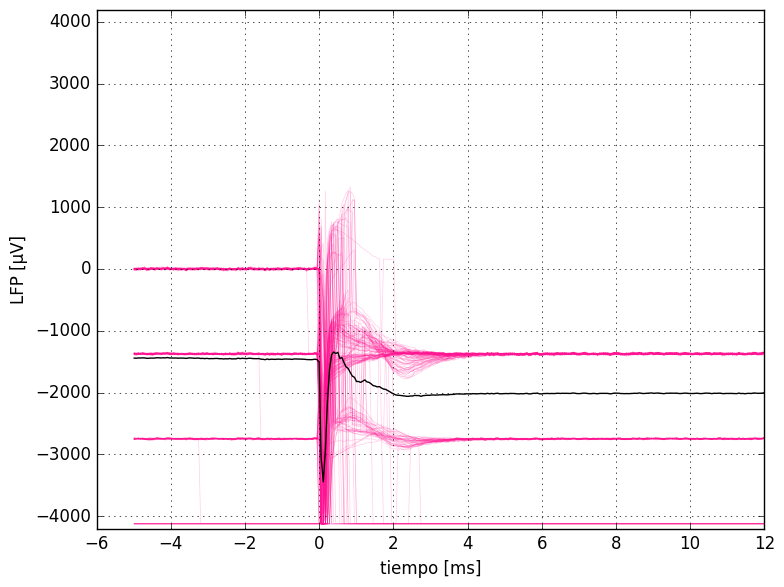

161


In [51]:
figure(figsize=(8,6))
grid()
xlim(-6,12)
limites=4200
ylim(-limites,limites)
promedio=zeros(tmax)
k=0
anotherwholefockenevent=[]
for q in saturados
    x=q[2]
    y=q[1]
    if x != 1 && y != 1 && x>45 
    k+=1
    datos=vec(LFP[y,x,1:tmax])
        anotherwholefockenevent=vcat(anotherwholefockenevent,datos)
    promedio+=datos
 
        plot(tiemporeal, datos, c="deeppink", alpha=0.2, lw=0.5)   
    end
end
promedio=promedio/k
plot(tiemporeal, promedio, c="black")
xlabel("tiempo [ms]")
ylabel("LFP [µV]")

tight_layout()
println(k)

outname=string(palabrita,"Trazos_Saturados-01.png")

savefig(outname, dpi=90)

